In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Some things I've learned about the data:
- there were fires in every state except Delaware in 2018.
- Fire names seem to be repeated, but it's hard for me to distinguish how to parse them


Could be cool to look at:
- States with the most fires
- Classes of fires and numbers
- Human vs non-human fires

In [2]:
data = pd.read_csv('./2018_FireDetailsDataset.csv')

In [3]:
data.head(5)

,FOD_ID,NWCG_REPORTING_UNIT_ID,SOURCE_REPORTING_UNIT_NAME,FIRE_NAME,MTBS_FIRE_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,NWCG_CAUSE_CLASSIFICATION,NWCG_GENERAL_CAUSE,CONT_DATE,CONT_DOY,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE,FIPS_NAME
0,400302586,USAZTNF,Tonto National Forest,TREE,NaN,2018,1/1/2018,1,Human,Debris and open burning,1/2/2018,2.0,0.3,B,34.360556,-111.096667,AZ,Gila County
1,400304650,USAZTNF,Tonto National Forest,GOLD,NaN,2018,1/1/2018,1,Human,Fireworks,NaN,NaN,0.4,B,33.795278,-111.483333,AZ,Maricopa County
2,400306018,USAZCRD,Colorado River District,DUCK,NaN,2018,1/1/2018,1,Human,Fireworks,1/1/2018,1.0,5.0,B,32.949400,-114.466900,AZ,Yuma County
3,400306089,USAZFTA,Fort Apache Agency,313,NaN,2018,1/1/2018,1,Human,Arson/incendiarism,1/3/2018,3.0,0.1,A,33.968600,-110.318600,AZ,NaN
4,400306251,USAZHOA,Hopi Agency,NEW YEAR,NaN,2018,1/1/2018,1,Human,Debris and open burning,1/1/2018,1.0,0.3,B,35.966100,-110.737200,AZ,NaN


## Making a dictionary of dataframes by fire size class (A-G)
- Class A:  0.25 acres or less;
- Class B:  > 0.25 acres, < 10 acres;
- Class C:  >= 10 acres, < 100 acres;
- Class D:  >= 100 acres, < 300 acres;
- Class E:  >= 300 acres, < 1,000 acres;
- Class F:  >= 1,000 acres, < 5,000 acres;
- Class G: >= 5,000 acres.

In [4]:
sizeclass = list(sorted(data['FIRE_SIZE_CLASS'].unique()))
sizeclass

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [5]:
size_dic = {}
for size in sizeclass:
    size_dic[size] = data.loc[data['FIRE_SIZE_CLASS'] == size]

In [6]:
for (key, value) in size_dic.items():
    print('#{}: {}, {}: {} acres burned'.format(key, len(value), key, round(value['FIRE_SIZE'].sum())))

#A: 40314, A: 3820 acres burned
#B: 31396, B: 62831 acres burned
#C: 6865, C: 202977 acres burned
#D: 1085, D: 173839 acres burned
#E: 621, E: 319395 acres burned
#F: 378, F: 864147 acres burned
#G: 204, G: 6616913 acres burned


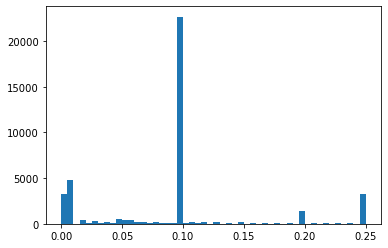

In [7]:
_,_,_ = plt.hist(x=size_dic['A']['FIRE_SIZE'], bins=50)

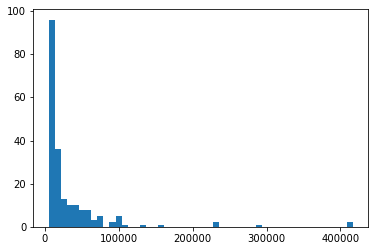

In [8]:
_,_,_ = plt.hist(x=size_dic['G']['FIRE_SIZE'], bins=50)

In [9]:
size_dic['G'].head()

,FOD_ID,NWCG_REPORTING_UNIT_ID,SOURCE_REPORTING_UNIT_NAME,FIRE_NAME,MTBS_FIRE_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,NWCG_CAUSE_CLASSIFICATION,NWCG_GENERAL_CAUSE,CONT_DATE,CONT_DOY,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE,FIPS_NAME
583,400380336,USCACDF,"Headquarters, California Department of Forestr...",NaN,NaN,2018,1/3/2018,3,Human,Missing data/not specified/undetermined,NaN,NaN,12300.01,G,37.607204,-121.010773,CA,Stanislaus County
4179,400389708,USTXTXS,Texas A & M Forest Service,62,62,2018,1/25/2018,25,Human,Missing data/not specified/undetermined,NaN,NaN,5942.00,G,34.016000,-100.559333,TX,Motley County
6086,400311783,USOKOSA,Osage Agency,EAST BUFORD,EAST BUFORD,2018,2/3/2018,34,Human,Arson/incendiarism,2/13/2018,44.0,6830.00,G,36.420800,-96.464400,OK,NaN
10949,400361589,USCOWILX,Wiley Fire Department,RABBIT 22 FIRE,RABBIT 22,2018,3/3/2018,62,Human,Missing data/not specified/undetermined,3/4/2018,63.0,8000.00,G,38.164500,-102.357500,CO,Prowers County
11248,400314274,USFLTTR,TEN THOUSAND ISLANDS NWR,FAKA-UNION ASSIST,FAKA-UNION (11),2018,3/4/2018,63,Human,Missing data/not specified/undetermined,3/31/2018,90.0,10466.00,G,26.022161,-81.512006,FL,Collier County


In [10]:
size_dic['G'].sort_values(by=['FIRE_SIZE'], ascending=False).head()

,FOD_ID,NWCG_REPORTING_UNIT_ID,SOURCE_REPORTING_UNIT_NAME,FIRE_NAME,MTBS_FIRE_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,NWCG_CAUSE_CLASSIFICATION,NWCG_GENERAL_CAUSE,CONT_DATE,CONT_DOY,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE,FIPS_NAME
52867,400311253,USNVWID,Winnemucca District Office,MARTIN,MARTIN,2018,7/5/2018,186,Human,Missing data/not specified/undetermined,7/21/2018,202.0,416821.20,G,41.527330,-117.426523,NV,Humboldt County
61761,400305003,USCAMNF,Mendocino National Forest,RANCH,RANCH,2018,7/28/2018,209,Human,Equipment and vehicle use,10/19/2018,292.0,410203.00,G,39.238889,-123.108611,CA,Mendocino County
24251,400311640,USOKCOA,Concho Field Office,RHEA,RHEA,2018,4/12/2018,102,Human,Missing data/not specified/undetermined,4/27/2018,117.0,286196.00,G,35.848600,-99.213331,OK,NaN
66999,400301145,USNVHTF,Humboldt-Toiyabe National Forest,SOUTH SUGARLOAF,SOUTH SUGARLOAF,2018,8/17/2018,229,Natural,Natural,10/10/2018,283.0,233458.32,G,41.811667,-116.323889,NV,Elko County
59889,400302960,USCASHF,Shasta-Trinity National Forest,CARR,CARR,2018,7/23/2018,204,Human,Equipment and vehicle use,8/29/2018,241.0,229651.00,G,40.670000,-122.643056,CA,Shasta County


In [11]:
len(size_dic['G']['FIRE_NAME'].unique())

200

In [12]:
dg = size_dic['G'][size_dic['G']['CONT_DATE'].isna()].sort_values(by=['FIRE_SIZE'], ascending=False)

In [13]:
size_dic['G'].sort_values(by=['FIRE_SIZE'], ascending = False).head(15)

,FOD_ID,NWCG_REPORTING_UNIT_ID,SOURCE_REPORTING_UNIT_NAME,FIRE_NAME,MTBS_FIRE_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,NWCG_CAUSE_CLASSIFICATION,NWCG_GENERAL_CAUSE,CONT_DATE,CONT_DOY,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE,FIPS_NAME
52867,400311253,USNVWID,Winnemucca District Office,MARTIN,MARTIN,2018,7/5/2018,186,Human,Missing data/not specified/undetermined,7/21/2018,202.0,416821.20,G,41.527330,-117.426523,NV,Humboldt County
61761,400305003,USCAMNF,Mendocino National Forest,RANCH,RANCH,2018,7/28/2018,209,Human,Equipment and vehicle use,10/19/2018,292.0,410203.00,G,39.238889,-123.108611,CA,Mendocino County
24251,400311640,USOKCOA,Concho Field Office,RHEA,RHEA,2018,4/12/2018,102,Human,Missing data/not specified/undetermined,4/27/2018,117.0,286196.00,G,35.848600,-99.213331,OK,NaN
66999,400301145,USNVHTF,Humboldt-Toiyabe National Forest,SOUTH SUGARLOAF,SOUTH SUGARLOAF,2018,8/17/2018,229,Natural,Natural,10/10/2018,283.0,233458.32,G,41.811667,-116.323889,NV,Elko County
59889,400302960,USCASHF,Shasta-Trinity National Forest,CARR,CARR,2018,7/23/2018,204,Human,Equipment and vehicle use,8/29/2018,241.0,229651.00,G,40.670000,-122.643056,CA,Shasta County
77597,400307281,USCANOD,Northern California District,CAMP,CAMP,2018,11/8/2018,312,Human,Power generation/transmission/distribution,11/25/2018,329.0,153336.00,G,39.813900,-121.434700,CA,Butte County
61218,400310945,USNVEKD,Elko District Office,GOOSE CREEK,GOOSE CREEK,2018,7/26/2018,207,Natural,Natural,9/26/2018,269.0,132216.50,G,41.807200,-114.066400,NV,Elko County
49073,400302444,USCOPSF,Pike and San Isabel National Forest,SPRING CREEK,SPRING CREEK,2018,6/26/2018,177,Human,Arson/incendiarism,NaN,NaN,107995.00,G,37.496389,-105.290833,CO,Costilla County
71095,400302700,USUTUWF,Uinta-Wasatch-Cache National Forest,POLE CREEK,POLE CREEK,2018,9/6/2018,249,Natural,Natural,9/8/2018,251.0,102191.00,G,39.805833,-111.660556,UT,Juab County
47794,400312226,USORPRD,Prineville District,BOXCAR,BOXCAR 0410 RN,2018,6/21/2018,172,Natural,Natural,7/12/2018,193.0,100226.00,G,45.159700,-121.070500,OR,Wasco County


In [14]:
#size_dic['G'].to_csv('./classg_2018_editedcontdate.csv', index=False)

## Cleaning up data?
I didn't find any really great ways to clean the dataset

In [15]:
data[data['CONT_DATE'].isna()]

,FOD_ID,NWCG_REPORTING_UNIT_ID,SOURCE_REPORTING_UNIT_NAME,FIRE_NAME,MTBS_FIRE_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,NWCG_CAUSE_CLASSIFICATION,NWCG_GENERAL_CAUSE,CONT_DATE,CONT_DOY,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE,FIPS_NAME
1,400304650,USAZTNF,Tonto National Forest,GOLD,NaN,2018,1/1/2018,1,Human,Fireworks,NaN,NaN,0.40,B,33.795278,-111.483333,AZ,Maricopa County
70,400350321,USTXTXS,Texas Forest Service,18-003,NaN,2018,1/1/2018,1,Human,Debris and open burning,NaN,NaN,10.00,C,33.436360,-96.385950,TX,Grayson County
71,400350387,USTXTXS,Texas Forest Service,CR 190,NaN,2018,1/1/2018,1,Human,Debris and open burning,NaN,NaN,5.00,B,30.521600,-96.105200,TX,Grimes County
72,400351068,USTXTXS,Texas Forest Service,1800042-BRUSH FIRE,NaN,2018,1/1/2018,1,Human,Debris and open burning,NaN,NaN,0.25,A,30.271230,-95.077120,TX,Liberty County
73,400352021,USTXTXS,Texas Forest Service,BARNETT FIRE,NaN,2018,1/1/2018,1,Human,Debris and open burning,NaN,NaN,1.00,B,31.047420,-96.505110,TX,Robertson County
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80823,400384506,USCACDF,"Headquarters, California Department of Forestr...",NaN,NaN,2018,12/31/2018,365,Missing data/not specified/undetermined,Missing data/not specified/undetermined,NaN,NaN,0.10,A,37.995045,-121.784883,CA,Contra Costa County
80824,400385722,USTXTXS,Texas Forest Service,HWY 350 & N CR 45 GRASS FIRE,NaN,2018,12/31/2018,365,Missing data/not specified/undetermined,Missing data/not specified/undetermined,NaN,NaN,1.00,B,32.377600,-101.377000,TX,Howard County
80825,400386259,USCACDF,"Headquarters, California Department of Forestr...",NaN,NaN,2018,12/31/2018,365,Missing data/not specified/undetermined,Missing data/not specified/undetermined,NaN,NaN,1.00,B,36.666720,-121.628095,CA,Monterey County
80826,400387672,USCACDF,"Headquarters, California Department of Forestr...",NaN,NaN,2018,12/31/2018,365,Missing data/not specified/undetermined,Missing data/not specified/undetermined,NaN,NaN,0.01,A,37.950960,-121.276001,CA,San Joaquin County


In [16]:
len(data)

80863

In [17]:
len(data['FIRE_NAME'].unique())

50803

In [18]:
data.loc[data['FIRE_NAME'] == 'NEW YEAR']

,FOD_ID,NWCG_REPORTING_UNIT_ID,SOURCE_REPORTING_UNIT_NAME,FIRE_NAME,MTBS_FIRE_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,NWCG_CAUSE_CLASSIFICATION,NWCG_GENERAL_CAUSE,CONT_DATE,CONT_DOY,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE,FIPS_NAME
4,400306251,USAZHOA,Hopi Agency,NEW YEAR,NaN,2018,1/1/2018,1,Human,Debris and open burning,1/1/2018,1.0,0.30,B,35.966100,-110.737200,AZ,NaN
15,400318860,USNCNCS,North Carolina State Division of Forest Resouces,NEW YEAR,NaN,2018,1/1/2018,1,Human,Fireworks,1/1/2018,1.0,0.69,B,35.614869,-78.038514,NC,Wilson County
20,400318865,USNCNCS,North Carolina State Division of Forest Resouces,NEW YEAR,NaN,2018,1/1/2018,1,Human,Fireworks,1/1/2018,1.0,0.02,A,34.920915,-79.998570,NC,Anson County
22,400318867,USNCNCS,North Carolina State Division of Forest Resouces,NEW YEAR,NaN,2018,1/1/2018,1,Human,Fireworks,1/1/2018,1.0,0.09,A,35.581437,-81.867544,NC,McDowell County
63,400334061,USNCNCS,North Carolina State Division of Forest Resouces,NEW YEAR,NaN,2018,1/1/2018,1,Human,Debris and open burning,1/1/2018,1.0,0.09,A,35.991610,-78.247215,NC,Franklin County
95,400306678,USAZSCA,San Carlos Agency,NEW YEAR,NaN,2018,1/1/2018,1,Human,Missing data/not specified/undetermined,1/23/2018,23.0,0.40,B,33.324200,-110.449700,AZ,NaN


In [19]:
len(data['MTBS_FIRE_NAME'])

80863

In [20]:
data.loc[data['FIRE_NAME'] == 'CARR']

,FOD_ID,NWCG_REPORTING_UNIT_ID,SOURCE_REPORTING_UNIT_NAME,FIRE_NAME,MTBS_FIRE_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,NWCG_CAUSE_CLASSIFICATION,NWCG_GENERAL_CAUSE,CONT_DATE,CONT_DOY,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE,FIPS_NAME
43639,400307331,USCAWNP,Whiskeytown National Recreation Area,CARR,NaN,2018,6/6/2018,157,Human,Arson/incendiarism,6/6/2018,157.0,0.1,A,40.653000,-122.624000,CA,NaN
56905,400301303,USCAMDF,Modoc National Forest,CARR,NaN,2018,7/15/2018,196,Natural,Natural,7/16/2018,197.0,0.1,A,41.933889,-121.161944,CA,Modoc County
59889,400302960,USCASHF,Shasta-Trinity National Forest,CARR,CARR,2018,7/23/2018,204,Human,Equipment and vehicle use,8/29/2018,241.0,229651.0,G,40.670000,-122.643056,CA,Shasta County
70186,400317233,USUTSES,Southeast Area,CARR,NaN,2018,9/1/2018,244,Natural,Natural,NaN,NaN,0.1,A,37.931480,-109.070396,UT,Box Elder County
79573,400304398,USAZCNF,Coronado National Forest,CARR,NaN,2018,12/5/2018,339,Human,Missing data/not specified/undetermined,NaN,NaN,0.5,B,31.449444,-110.281667,AZ,Cochise County


In [21]:
duplicate = data[data.duplicated(['FIRE_NAME', 'STATE', 'DISCOVERY_DATE', 'NWCG_REPORTING_UNIT_ID', 'CONT_DATE'])]
duplicate

,FOD_ID,NWCG_REPORTING_UNIT_ID,SOURCE_REPORTING_UNIT_NAME,FIRE_NAME,MTBS_FIRE_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,NWCG_CAUSE_CLASSIFICATION,NWCG_GENERAL_CAUSE,CONT_DATE,CONT_DOY,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE,FIPS_NAME
16,400318861,USSCSCS,South Carolina Forestry Commission,NaN,NaN,2018,1/1/2018,1,Human,Fireworks,1/1/2018,1.0,1.50,B,33.484253,-81.522217,SC,Aiken County
17,400318862,USSCSCS,South Carolina Forestry Commission,NaN,NaN,2018,1/1/2018,1,Human,Fireworks,1/1/2018,1.0,1.00,B,33.437149,-80.905853,SC,Orangeburg County
18,400318863,USSCSCS,South Carolina Forestry Commission,NaN,NaN,2018,1/1/2018,1,Human,Fireworks,1/1/2018,1.0,1.50,B,33.808353,-80.357384,SC,Sumter County
20,400318865,USNCNCS,North Carolina State Division of Forest Resouces,NEW YEAR,NaN,2018,1/1/2018,1,Human,Fireworks,1/1/2018,1.0,0.02,A,34.920915,-79.998570,NC,Anson County
21,400318866,USSCSCS,South Carolina Forestry Commission,NaN,NaN,2018,1/1/2018,1,Human,Fireworks,1/1/2018,1.0,0.50,B,34.709328,-81.591393,SC,Union County
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80814,400332048,USCACDF,"Headquarters, California Department of Forestr...",NaN,NaN,2018,12/31/2018,365,Human,Smoking,NaN,NaN,0.01,A,37.679536,-122.470706,CA,San Mateo County
80819,400375295,USCACDF,"Headquarters, California Department of Forestr...",NaN,NaN,2018,12/31/2018,365,Human,Missing data/not specified/undetermined,NaN,NaN,0.01,A,37.714376,-121.717407,CA,Alameda County
80823,400384506,USCACDF,"Headquarters, California Department of Forestr...",NaN,NaN,2018,12/31/2018,365,Missing data/not specified/undetermined,Missing data/not specified/undetermined,NaN,NaN,0.10,A,37.995045,-121.784883,CA,Contra Costa County
80825,400386259,USCACDF,"Headquarters, California Department of Forestr...",NaN,NaN,2018,12/31/2018,365,Missing data/not specified/undetermined,Missing data/not specified/undetermined,NaN,NaN,1.00,B,36.666720,-121.628095,CA,Monterey County


In [22]:
group = data.groupby(['FIRE_NAME', 'STATE', 'DISCOVERY_DATE', 'NWCG_REPORTING_UNIT_ID', 'CONT_DATE']).size().reset_index(name='Freq')
group['FIRE_NAME']

0         0000005 - 2018
1         0000131 - 2018
2         1800124 - 2018
3         1800225 - 2018
4         1800269 - 2018
              ...       
53411        ZOO PARKWAY
53412               ZOOM
53413               ZULU
53414               ZUNI
53415             ZZ TOP
Name: FIRE_NAME, Length: 53416, dtype: object

In [23]:
group.loc[group['FIRE_NAME'] == 'NEW YEAR']

,FIRE_NAME,STATE,DISCOVERY_DATE,NWCG_REPORTING_UNIT_ID,CONT_DATE,Freq
38500,NEW YEAR,AZ,1/1/2018,USAZHOA,1/1/2018,1
38501,NEW YEAR,AZ,1/1/2018,USAZSCA,1/23/2018,1
38502,NEW YEAR,NC,1/1/2018,USNCNCS,1/1/2018,4


In [24]:
duplicate_all = data[data.duplicated(['FIRE_NAME'], )]
duplicate

,FOD_ID,NWCG_REPORTING_UNIT_ID,SOURCE_REPORTING_UNIT_NAME,FIRE_NAME,MTBS_FIRE_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,NWCG_CAUSE_CLASSIFICATION,NWCG_GENERAL_CAUSE,CONT_DATE,CONT_DOY,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE,FIPS_NAME
16,400318861,USSCSCS,South Carolina Forestry Commission,NaN,NaN,2018,1/1/2018,1,Human,Fireworks,1/1/2018,1.0,1.50,B,33.484253,-81.522217,SC,Aiken County
17,400318862,USSCSCS,South Carolina Forestry Commission,NaN,NaN,2018,1/1/2018,1,Human,Fireworks,1/1/2018,1.0,1.00,B,33.437149,-80.905853,SC,Orangeburg County
18,400318863,USSCSCS,South Carolina Forestry Commission,NaN,NaN,2018,1/1/2018,1,Human,Fireworks,1/1/2018,1.0,1.50,B,33.808353,-80.357384,SC,Sumter County
20,400318865,USNCNCS,North Carolina State Division of Forest Resouces,NEW YEAR,NaN,2018,1/1/2018,1,Human,Fireworks,1/1/2018,1.0,0.02,A,34.920915,-79.998570,NC,Anson County
21,400318866,USSCSCS,South Carolina Forestry Commission,NaN,NaN,2018,1/1/2018,1,Human,Fireworks,1/1/2018,1.0,0.50,B,34.709328,-81.591393,SC,Union County
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80814,400332048,USCACDF,"Headquarters, California Department of Forestr...",NaN,NaN,2018,12/31/2018,365,Human,Smoking,NaN,NaN,0.01,A,37.679536,-122.470706,CA,San Mateo County
80819,400375295,USCACDF,"Headquarters, California Department of Forestr...",NaN,NaN,2018,12/31/2018,365,Human,Missing data/not specified/undetermined,NaN,NaN,0.01,A,37.714376,-121.717407,CA,Alameda County
80823,400384506,USCACDF,"Headquarters, California Department of Forestr...",NaN,NaN,2018,12/31/2018,365,Missing data/not specified/undetermined,Missing data/not specified/undetermined,NaN,NaN,0.10,A,37.995045,-121.784883,CA,Contra Costa County
80825,400386259,USCACDF,"Headquarters, California Department of Forestr...",NaN,NaN,2018,12/31/2018,365,Missing data/not specified/undetermined,Missing data/not specified/undetermined,NaN,NaN,1.00,B,36.666720,-121.628095,CA,Monterey County


In [25]:
nan = pd.isna(data['FIRE_NAME'])

In [26]:
nan_mtbs = pd.isna(data['MTBS_FIRE_NAME'])

In [27]:
nan_mtbs

0        True
1        True
2        True
3        True
4        True
         ... 
80858    True
80859    True
80860    True
80861    True
80862    True
Name: MTBS_FIRE_NAME, Length: 80863, dtype: bool

In [28]:
len(nan_mtbs[nan_mtbs])

80305

In [29]:
# 13806 NaN values for FIRE_NAME in the dataset
len(nan[nan])

13806

In [30]:
#nullname
#len(nullname)

## Making a dictionary of dataframes by state (2018)

In [31]:
states = list(sorted(data['STATE'].unique()))
#states

In [32]:
state_dic = {}
for state in states:
    state_dic[state] = data.loc[data['STATE'] == state]

In [33]:
len(data.loc[data['STATE'] == 'AK'])

359

In [34]:
state_dic['AK']['FIRE_SIZE'].describe()

count      359.000000
mean      1144.944150
std       6323.605006
min          0.100000
25%          0.100000
50%          0.300000
75%         12.200000
max      71941.900000
Name: FIRE_SIZE, dtype: float64

### Summing acres burned on a state basis

In [35]:
state_dic['AK']['FIRE_SIZE'].sum()

411034.95

In [36]:
state_sum = []
for key, value in state_dic.items():
    tup = (key, round(value['FIRE_SIZE'].sum()))
    state_sum.append(tup)

In [37]:
statesum_df = pd.DataFrame(state_sum, columns = ['state', 'total_acres_burned'])

In [38]:
# adding data in for delaware since it didn't have any
statesum_df.loc[len(statesum_df.index)] = ['DE', 0]

In [39]:
statesum_df.sort_values(by='state', ignore_index=True, inplace=True)
#statesum_df

In [40]:
#statesum_df.to_csv( './burnedacres_bystate.csv', index=False)

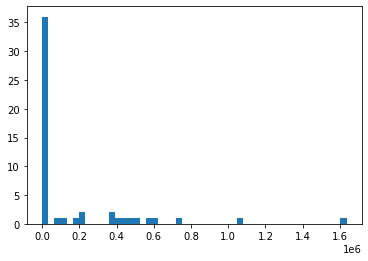

In [41]:
_,_,_ = plt.hist(x=statesum_df['total_acres_burned'] , bins=50)

In [101]:
#state_dic['HI']

#### Humans vs natural on a per state basis

In [ ]:
statecause_sum = []
for key, value in state_dic.items():
    
    tup = (key, round(value['FIRE_SIZE'].sum()))
    state_sum.append(tup)

In [102]:
cause_list = data['NWCG_CAUSE_CLASSIFICATION'].unique()
cause_list

array(['Human', 'Natural', 'Missing data/not specified/undetermined'],
      dtype=object)

In [117]:
statecause_list = []
for key, value in state_dic.items():
    cause_sumlist = []
    for cause in cause_list:
        statecause = value.loc[value['NWCG_CAUSE_CLASSIFICATION'] == cause]
        statecause_sum = round(statecause['FIRE_SIZE'].sum())
        
        cause_sumlist.append((cause, statecause_sum))
    
    statecause_list.append(cause_sumlist)

In [118]:
#statecause_list

In [119]:
concat_list = []
for df in statecause_list:
    dd = pd.DataFrame(df).T
    dd.columns = dd.iloc[0]
    dd.drop(dd.index[0], inplace=True)
    
    concat_list.append(dd)

sumcause_df = pd.concat(concat_list)

In [120]:
sumcause_df.insert(0, 'State', list(state_dic.keys()))
sumcause_df.reset_index(drop=True, inplace=True)

In [121]:
#sumcause_df

# Loading in Big Data Set
to make sure I didn't lose anything in the transfer

In [42]:
big_data = pd.read_csv('./1992to2018_FireDetails.csv', parse_dates=['DISCOVERY_DATE', 'CONT_DATE'], low_memory=False)

In [43]:
big_data.shape

(2166753, 37)

### Breakdown of causes of fires by 'Cause Classification' and the more specific 'General Cause'
I think this can be looked at as cause classification as the broad category and general cause as the subsidiary

In [44]:
big_data['NWCG_CAUSE_CLASSIFICATION'].unique()

array(['Human', 'Natural', 'Missing data/not specified/undetermined', nan],
      dtype=object)

In [45]:
cause = (big_data['NWCG_CAUSE_CLASSIFICATION'].value_counts())

In [46]:
cause.sort_index()

Human                                      1680058
Missing data/not specified/undetermined     173887
Natural                                     312807
Name: NWCG_CAUSE_CLASSIFICATION, dtype: int64

In [47]:
big_data['NWCG_GENERAL_CAUSE'].unique()

array(['Power generation/transmission/distribution', 'Natural',
       'Debris and open burning',
       'Missing data/not specified/undetermined',
       'Recreation and ceremony', 'Equipment and vehicle use',
       'Arson/incendiarism', 'Fireworks', 'Other causes',
       'Railroad operations and maintenance', 'Smoking',
       'Misuse of fire by a minor', 'Firearms and explosives use'],
      dtype=object)

In [48]:
gcause = big_data['NWCG_GENERAL_CAUSE'].value_counts().sort_index()
gcause

Arson/incendiarism                            310320
Debris and open burning                       507219
Equipment and vehicle use                     175824
Firearms and explosives use                     2205
Fireworks                                      17205
Missing data/not specified/undetermined       547438
Misuse of fire by a minor                      64630
Natural                                       312807
Other causes                                    9763
Power generation/transmission/distribution     28491
Railroad operations and maintenance            36437
Recreation and ceremony                        92725
Smoking                                        61689
Name: NWCG_GENERAL_CAUSE, dtype: int64

### Year dictionary

In [49]:
years = list(sorted(big_data['FIRE_YEAR'].unique()))
#years

In [50]:
year_dic = {}
for year in years:
    year_dic[year] = big_data.loc[big_data['FIRE_YEAR'] == year]

In [51]:
year_sum = []
for key, value in year_dic.items():
    tup = (key, value.shape[0],
           round(value['FIRE_SIZE'].sum()))
    year_sum.append(tup)

In [52]:
yearsum_df = pd.DataFrame(year_sum, columns = 
                          ['year', 'total_fires',
                           'total_acres_burned'])#,
                           #'cause_classification',
                           #'general_cause'])

In [53]:
yearsum_df.head()

,year,total_fires,total_acres_burned
0,1992,67961,2199923
1,1993,61975,2191587
2,1994,75932,4115582
3,1995,71440,2049553
4,1996,75561,6004833


In [54]:
#yearsum_df.to_csv('./firesummary_byyear.csv', index=False)

-----
-----

### Making csv's for causes

In [55]:
causeclass = value['NWCG_CAUSE_CLASSIFICATION'].value_counts().sort_index()
gencause = value['NWCG_GENERAL_CAUSE'].value_counts().sort_index()

In [56]:
#gcause = big_data['NWCG_GENERAL_CAUSE'].value_counts().sort_index().to_frame().T
#gcause

In [57]:
classcause_sum = []
for key, value in year_dic.items():
    dfclass = value['NWCG_CAUSE_CLASSIFICATION'].value_counts().sort_index().to_frame().T
    
    classcause_sum.append(dfclass)

In [58]:
#classcause_sum

In [59]:
df_classcause = pd.concat(classcause_sum)

In [60]:
df_classcause.insert(0, 'year', list(year_dic.keys()))

In [61]:
df_classcause.reset_index(drop=True, inplace=True)

In [62]:
gencause_sum = []
for key, value in year_dic.items():
    dfgen = value['NWCG_GENERAL_CAUSE'].value_counts().sort_index().to_frame().T
    
    gencause_sum.append(dfgen)

In [63]:
#gencause_sum

In [64]:
df_gencause = pd.concat(gencause_sum)
#df_gencause

In [65]:
#df_gencause.insert(0, 'year', list(year_dic.keys()))

In [66]:
df_gencause.reset_index(drop=True, inplace=True)

In [67]:
df_gencause['Firearms and explosives use'] = df_gencause['Firearms and explosives use'].fillna(0).astype(int)

In [68]:
df_classcause.head()

,year,Human,Missing data/not specified/undetermined,Natural
0,1992,47399,7986,12576
1,1993,45417,8710,7848
2,1994,49617,9437,16878
3,1995,55006,7916,8518
4,1996,53264,9148,13149


In [69]:
df_gencause.head()

,Arson/incendiarism,Debris and open burning,Equipment and vehicle use,Firearms and explosives use,Fireworks,Missing data/not specified/undetermined,Misuse of fire by a minor,Natural,Other causes,Power generation/transmission/distribution,Railroad operations and maintenance,Recreation and ceremony,Smoking
0,11250,12792,5637,1,278,14837,2750,12576,230,192,2000,2774,2644
1,11036,12508,5516,1,278,14931,2288,7848,122,166,1840,3012,2429
2,10235,14964,5412,0,511,15879,2979,16878,193,210,1970,4036,2665
3,12889,16856,5585,3,277,14443,3034,8518,295,202,2168,4252,2918
4,10449,17039,6174,7,453,15094,2766,13149,253,361,2914,4392,2510


In [70]:
df_causecombo = pd.concat([df_classcause, df_gencause], axis=1)
df_causecombo.head()

,year,Human,Missing data/not specified/undetermined,Natural,Arson/incendiarism,Debris and open burning,Equipment and vehicle use,Firearms and explosives use,Fireworks,Missing data/not specified/undetermined,Misuse of fire by a minor,Natural,Other causes,Power generation/transmission/distribution,Railroad operations and maintenance,Recreation and ceremony,Smoking
0,1992,47399,7986,12576,11250,12792,5637,1,278,14837,2750,12576,230,192,2000,2774,2644
1,1993,45417,8710,7848,11036,12508,5516,1,278,14931,2288,7848,122,166,1840,3012,2429
2,1994,49617,9437,16878,10235,14964,5412,0,511,15879,2979,16878,193,210,1970,4036,2665
3,1995,55006,7916,8518,12889,16856,5585,3,277,14443,3034,8518,295,202,2168,4252,2918
4,1996,53264,9148,13149,10449,17039,6174,7,453,15094,2766,13149,253,361,2914,4392,2510


In [71]:
#df_causecombo.to_csv('./causeoffire_byyear.csv', index=False)

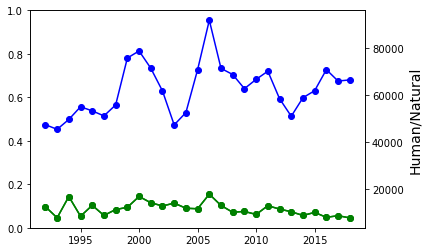

In [72]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
#ax.plot(yearsum_df.year, yearsum_df.total_acres_burned, color="red", marker="o")
# set x-axis label
#ax.set_xlabel("year",fontsize=14)
# set y-axis label
#ax.set_ylabel("total_acres_burned",color="red",fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(df_causecombo.year, df_causecombo["Human"],color="blue",marker="o")
ax2.plot(df_causecombo.year, df_causecombo["Natural"],color="green",marker="o")
ax2.set_ylabel("Human/Natural", fontsize=14)
plt.show()

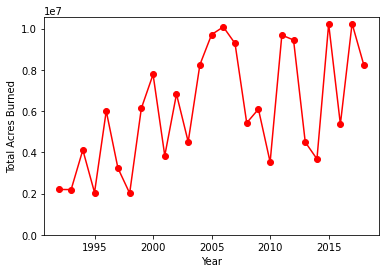

In [73]:
plt.plot(yearsum_df['year'], yearsum_df['total_acres_burned'], marker = 'o', color='red')
plt.xlabel('Year')
plt.ylabel('Total Acres Burned')
plt.ylim(0,10545663)
plt.show()
#plt.plot(df_causecombo['year'], df_causecombo['Human'])
#plt.plot(df_causecombo['year'], df_causecombo['Natural'])

----
----
### Size changes over years
Checking Class data to see if large wildfires increased over the years recorded

In [74]:
sizeclass_sum = []
for key, value in year_dic.items():
    dfsize = value['FIRE_SIZE_CLASS'].value_counts().sort_index().to_frame().T
    
    sizeclass_sum.append(dfsize)

In [75]:
#sizeclass_sum[0]

In [76]:
df_sizeclass = pd.concat(sizeclass_sum)
#df_sizeclass

In [77]:
df_sizeclass.insert(0, 'year', list(year_dic.keys()))

In [78]:
df_sizeclass.reset_index(drop=True, inplace=True)

In [79]:
df_sizeclass.head()

,year,A,B,C,D,E,F,G
0,1992,25531,32977,7954,876,368,197,58
1,1993,20761,32191,7571,831,397,159,65
2,1994,27890,36815,8829,1182,667,403,146
3,1995,23896,36850,8922,1005,473,225,69
4,1996,25114,37840,10118,1220,694,374,201


In [80]:
df_sizeclass.columns

Index(['year', 'A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype='object')

In [81]:
df_sizeclass2 = df_sizeclass.set_axis(['year', '#A', '#B', '#C', '#D', '#E', '#F', '#G'], axis=1)                      

In [82]:
df_sizeclass2.head()

,year,#A,#B,#C,#D,#E,#F,#G
0,1992,25531,32977,7954,876,368,197,58
1,1993,20761,32191,7571,831,397,159,65
2,1994,27890,36815,8829,1182,667,403,146
3,1995,23896,36850,8922,1005,473,225,69
4,1996,25114,37840,10118,1220,694,374,201


---

In [83]:
sizeclass

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [84]:
megalist = []
for key, value in year_dic.items():
    class_sumlist = []
    for size in sizeclass:
        yrclass = value.loc[value['FIRE_SIZE_CLASS'] == size]
        class_sum = round(yrclass['FIRE_SIZE'].sum())
        
        class_sumlist.append((size, class_sum))
    
    megalist.append(class_sumlist)

In [105]:
megalist

[[('A', 3021),
  ('B', 73032),
  ('C', 223552),
  ('D', 138751),
  ('E', 188603),
  ('F', 392469),
  ('G', 1180495)],
 [('A', 2478),
  ('B', 70810),
  ('C', 207438),
  ('D', 133823),
  ('E', 204211),
  ('F', 347143),
  ('G', 1225685)],
 [('A', 3314),
  ('B', 79471),
  ('C', 253557),
  ('D', 194533),
  ('E', 355468),
  ('F', 833244),
  ('G', 2395997)],
 [('A', 2905),
  ('B', 81907),
  ('C', 250855),
  ('D', 161951),
  ('E', 244813),
  ('F', 452710),
  ('G', 854413)],
 [('A', 2968),
  ('B', 85180),
  ('C', 289313),
  ('D', 199599),
  ('E', 349415),
  ('F', 802881),
  ('G', 4275478)],
 [('A', 2607),
  ('B', 67648),
  ('C', 190126),
  ('D', 113046),
  ('E', 144215),
  ('F', 247041),
  ('G', 2466885)],
 [('A', 2844),
  ('B', 77496),
  ('C', 221231),
  ('D', 146171),
  ('E', 211024),
  ('F', 405526),
  ('G', 951649)],
 [('A', 3423),
  ('B', 106800),
  ('C', 329266),
  ('D', 220697),
  ('E', 344757),
  ('F', 774920),
  ('G', 4357086)],
 [('A', 3869),
  ('B', 107189),
  ('C', 353796),
  ('D', 

In [85]:
concat_list = []
for df in megalist:
    dd = pd.DataFrame(df).T
    dd.columns = dd.iloc[0]
    dd.drop(dd.index[0], inplace=True)
    
    concat_list.append(dd)

sumdf = pd.concat(concat_list)

In [86]:
#sumdf.insert(0, 'year', list(year_dic.keys()))
sumdf.reset_index(drop=True, inplace=True)
sumdf.head()

,A,B,C,D,E,F,G
0,3021,73032,223552,138751,188603,392469,1180495
1,2478,70810,207438,133823,204211,347143,1225685
2,3314,79471,253557,194533,355468,833244,2395997
3,2905,81907,250855,161951,244813,452710,854413
4,2968,85180,289313,199599,349415,802881,4275478


In [87]:
sumdf2 = sumdf.set_axis(['A_acres', 'B_acres', 'C_acres', 'D_acres', 'E_acres', 'F_acres', 'G_acres'], axis=1)
sumdf2.head()

,A_acres,B_acres,C_acres,D_acres,E_acres,F_acres,G_acres
0,3021,73032,223552,138751,188603,392469,1180495
1,2478,70810,207438,133823,204211,347143,1225685
2,3314,79471,253557,194533,355468,833244,2395997
3,2905,81907,250855,161951,244813,452710,854413
4,2968,85180,289313,199599,349415,802881,4275478


In [88]:
df_sizeclasscombo = pd.concat([df_sizeclass2, sumdf2], axis=1)
df_sizeclasscombo.head()

,year,#A,#B,#C,#D,#E,#F,#G,A_acres,B_acres,C_acres,D_acres,E_acres,F_acres,G_acres
0,1992,25531,32977,7954,876,368,197,58,3021,73032,223552,138751,188603,392469,1180495
1,1993,20761,32191,7571,831,397,159,65,2478,70810,207438,133823,204211,347143,1225685
2,1994,27890,36815,8829,1182,667,403,146,3314,79471,253557,194533,355468,833244,2395997
3,1995,23896,36850,8922,1005,473,225,69,2905,81907,250855,161951,244813,452710,854413
4,1996,25114,37840,10118,1220,694,374,201,2968,85180,289313,199599,349415,802881,4275478


In [89]:
#df_sizeclasscombo.to_csv('./firesizeclass_byyear.csv', index=False)

In [90]:
sumdf2['%G'] = (sumdf2['G_acres']/sumdf.sum(axis=1))
sumdf2['%B'] = (sumdf2['B_acres']/sumdf.sum(axis=1))
sumdf2['%F'] = (sumdf2['F_acres']/sumdf.sum(axis=1))
sumdf2.head()

,A_acres,B_acres,C_acres,D_acres,E_acres,F_acres,G_acres,%G,%B,%F
0,3021,73032,223552,138751,188603,392469,1180495,0.536607,0.033198,0.178401
1,2478,70810,207438,133823,204211,347143,1225685,0.559268,0.03231,0.158398
2,3314,79471,253557,194533,355468,833244,2395997,0.582177,0.01931,0.202461
3,2905,81907,250855,161951,244813,452710,854413,0.416878,0.039963,0.220882
4,2968,85180,289313,199599,349415,802881,4275478,0.712006,0.014185,0.133706


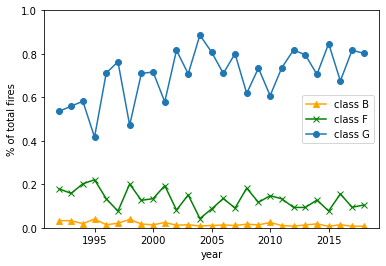

In [91]:
plt.plot(df_sizeclass2['year'], sumdf2['%B'], marker='^', color='orange', label='class B')
plt.plot(df_sizeclass2['year'], sumdf2['%F'], marker='x', color='green', label='class F')
plt.plot(df_sizeclass2['year'], sumdf2['%G'], marker='o', label='class G')

plt.xlabel('year')
plt.ylabel('% of total fires')
plt.legend()
plt.ylim(0,1)
plt.show()

## 2018 data check

In [92]:
data2018 = big_data.loc[big_data['FIRE_YEAR'] == 2018]

In [93]:
data2018['DISCOVERY_DATE'].head()

2045716   2018-08-22
2045717   2018-07-26
2045718   2018-09-21
2045719   2018-08-17
2045720   2018-08-12
Name: DISCOVERY_DATE, dtype: datetime64[ns]

In [94]:
#data2018.sort_values(by=('DISCOVERY_DATE'))

In [95]:
data2018.columns

Index(['FOD_ID', 'FPA_ID', 'SOURCE_SYSTEM_TYPE', 'SOURCE_SYSTEM',
       'NWCG_REPORTING_AGENCY', 'NWCG_REPORTING_UNIT_ID',
       'NWCG_REPORTING_UNIT_NAME', 'SOURCE_REPORTING_UNIT',
       'SOURCE_REPORTING_UNIT_NAME', 'LOCAL_FIRE_REPORT_ID',
       'LOCAL_INCIDENT_ID', 'FIRE_CODE', 'FIRE_NAME',
       'ICS_209_PLUS_INCIDENT_JOIN_ID', 'ICS_209_PLUS_COMPLEX_JOIN_ID',
       'MTBS_ID', 'MTBS_FIRE_NAME', 'COMPLEX_NAME', 'FIRE_YEAR',
       'DISCOVERY_DATE', 'DISCOVERY_DOY', 'DISCOVERY_TIME',
       'NWCG_CAUSE_CLASSIFICATION', 'NWCG_GENERAL_CAUSE',
       'NWCG_CAUSE_AGE_CATEGORY', 'CONT_DATE', 'CONT_DOY', 'CONT_TIME',
       'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'LATITUDE', 'LONGITUDE', 'OWNER_DESCR',
       'STATE', 'COUNTY', 'FIPS_CODE', 'FIPS_NAME'],
      dtype='object')

In [96]:
col_diff = list(set(list(data2018.columns)) - set(list(data.columns)))
col_diff

['DISCOVERY_TIME',
 'LOCAL_FIRE_REPORT_ID',
 'COUNTY',
 'ICS_209_PLUS_INCIDENT_JOIN_ID',
 'SOURCE_REPORTING_UNIT',
 'FIRE_CODE',
 'FPA_ID',
 'NWCG_REPORTING_AGENCY',
 'SOURCE_SYSTEM',
 'COMPLEX_NAME',
 'FIPS_CODE',
 'SOURCE_SYSTEM_TYPE',
 'ICS_209_PLUS_COMPLEX_JOIN_ID',
 'MTBS_ID',
 'OWNER_DESCR',
 'NWCG_CAUSE_AGE_CATEGORY',
 'NWCG_REPORTING_UNIT_NAME',
 'CONT_TIME',
 'LOCAL_INCIDENT_ID']

In [97]:
datadrop = data2018.drop(col_diff, axis=1)

In [98]:
datadrop

,FOD_ID,NWCG_REPORTING_UNIT_ID,SOURCE_REPORTING_UNIT_NAME,FIRE_NAME,MTBS_FIRE_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,NWCG_CAUSE_CLASSIFICATION,NWCG_GENERAL_CAUSE,CONT_DATE,CONT_DOY,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE,FIPS_NAME
2045716,400300001,USMTBRF,Bitterroot National Forest,BLODGETT,NaN,2018,2018-08-22,234,Natural,Natural,2018-08-22,234.0,0.1,A,46.275833,-114.379167,MT,Ravalli County
2045717,400300002,USMTBRF,Bitterroot National Forest,CORLEY GULCH,NaN,2018,2018-07-26,207,Human,Equipment and vehicle use,2018-07-28,209.0,0.1,A,46.404167,-113.921944,MT,Ravalli County
2045718,400300003,USMTBRF,Bitterroot National Forest,CANYON CREEK,NaN,2018,2018-09-21,264,Human,Recreation and ceremony,2018-09-23,266.0,1.0,B,46.245833,-114.308889,MT,Ravalli County
2045719,400300004,USMTBRF,Bitterroot National Forest,MAYNARD CREEK,NaN,2018,2018-08-17,229,Natural,Natural,NaT,NaN,0.1,A,45.784722,-114.033056,MT,Ravalli County
2045720,400300005,USMTBRF,Bitterroot National Forest,BLUE,NaN,2018,2018-08-12,224,Natural,Natural,2018-08-12,224.0,0.1,A,45.986944,-113.807222,MT,Ravalli County
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2166694,400481851,USCTCTS,Connecticut Division of Forestry,TURNPIKE RD/BALAZS RD,NaN,2018,2018-11-17,321,Human,Missing data/not specified/undetermined,2018-11-17,321.0,0.1,A,41.885375,-72.261468,CT,Tolland County
2166695,400481852,USCTCTS,Connecticut Division of Forestry,21 PLYMOUTH ROAD,NaN,2018,2018-12-12,346,Human,Missing data/not specified/undetermined,2018-12-12,346.0,0.1,A,41.985374,-72.446195,CT,Tolland County
2166696,400481854,USCTCTS,Connecticut Division of Forestry,257 STAGECOACH ROAD,NaN,2018,2018-04-16,106,Human,Debris and open burning,2018-04-16,106.0,0.1,A,41.459430,-72.662758,CT,Middlesex County
2166697,400481855,USCTCTS,Connecticut Division of Forestry,KINGS HWY AND GOOSE HILL RD,NaN,2018,2018-04-23,113,Human,Missing data/not specified/undetermined,2018-04-23,113.0,0.1,A,41.435494,-72.359669,CT,Middlesex County


In [99]:
datadrop.loc[datadrop['FIRE_NAME'] == 'SPRING CREEK']

,FOD_ID,NWCG_REPORTING_UNIT_ID,SOURCE_REPORTING_UNIT_NAME,FIRE_NAME,MTBS_FIRE_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,NWCG_CAUSE_CLASSIFICATION,NWCG_GENERAL_CAUSE,CONT_DATE,CONT_DOY,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE,FIPS_NAME
2046677,400300970,USUTMLF,Manti-Lasal National Forest,SPRING CREEK,NaN,2018,2018-07-10,191,Natural,Natural,2018-07-11,192.0,0.10,A,37.921111,-109.659722,UT,San Juan County
2047298,400301598,USWAGPF,Gifford Pinchot National Forest,SPRING CREEK,NaN,2018,2018-07-20,201,Human,Recreation and ceremony,2018-07-20,201.0,0.10,A,45.933333,-121.767500,WA,Skamania County
2048139,400302444,USCOPSF,Pike and San Isabel National Forest,SPRING CREEK,SPRING CREEK,2018,2018-06-26,177,Human,Arson/incendiarism,NaT,NaN,107995.00,G,37.496389,-105.290833,CO,Costilla County
2049464,400303788,USSDBKF,Black Hills National Forest,SPRING CREEK,NaN,2018,2018-04-12,102,Human,Recreation and ceremony,2018-04-12,102.0,0.10,A,43.985278,-103.428611,SD,Pennington County
2049593,400303917,USCOPSF,Pike and San Isabel National Forest,SPRING CREEK,NaN,2018,2018-06-14,165,Natural,Natural,2018-06-14,165.0,0.10,A,39.343889,-105.235833,CO,Jefferson County
2050363,400304698,USWYBTF,Bridger-Teton National Forest,SPRING CREEK,NaN,2018,2018-07-17,198,Natural,Natural,NaT,NaN,0.20,A,42.164722,-110.583056,WY,Lincoln County
2053158,400307580,USCOGJD,"Northwest District, Grand Junction",SPRING CREEK,NaN,2018,2018-05-08,128,Human,Recreation and ceremony,2018-05-08,128.0,0.10,A,39.614400,-106.902800,CO,Eagle County
2058303,400312916,USUTCCD,Cedar City Field Office,SPRING CREEK,NaN,2018,2018-08-24,236,Natural,Natural,2018-08-24,236.0,0.10,A,37.523900,-113.149700,UT,Iron County
2059073,400313763,USWYBFD,Buffalo Field Office,SPRING CREEK,NaN,2018,2018-08-17,229,Natural,Natural,2018-08-17,229.0,1.50,B,44.537460,-105.118570,WY,Campbell County
2061818,400317427,USMTEAS,Eastern Land Office,SPRING CREEK,NaN,2018,2018-08-03,215,Natural,Natural,NaT,NaN,10.00,C,45.857800,-105.255100,MT,Custer County
